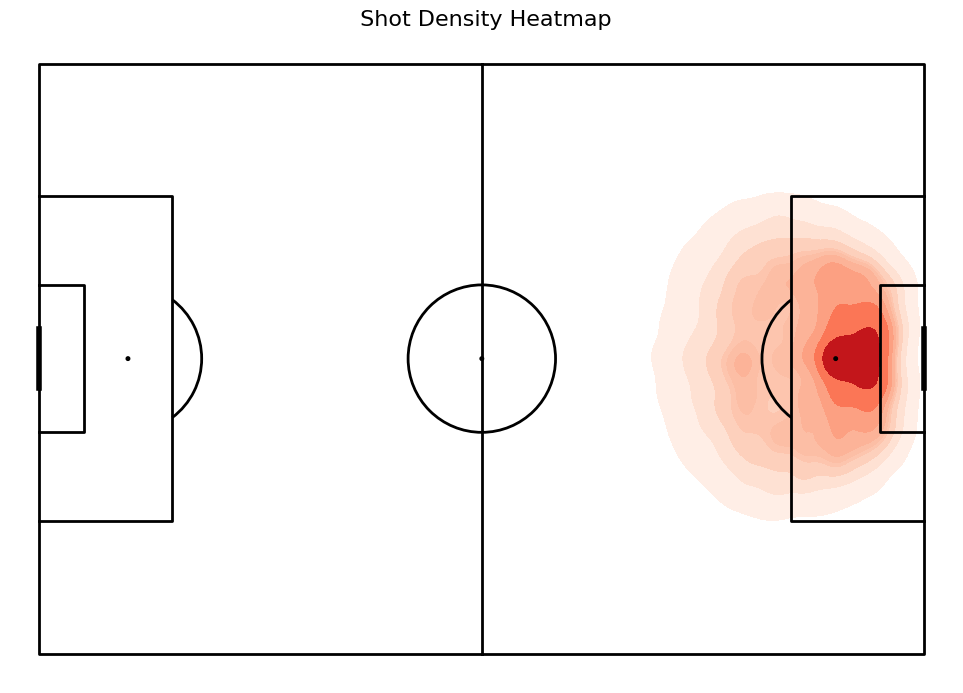

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import warnings


warnings.filterwarnings("ignore", category=FutureWarning)

# Load cleaned data
df = pd.read_csv('C:/Users/Acer/Desktop/analytics/clean_shots_final.csv')

#  Set up the football pitch = mplsoccer library
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(10, 7))

#  Create KDE (density) plot of shot locations
pitch.kdeplot(
    x=df['x'],
    y=df['y'],
    ax=ax,
    cmap='Reds',
    bw_adjust=0.9,
    thresh=0.05,
    fill=True  
)

#  Add title and layout
ax.set_title(' Shot Density Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


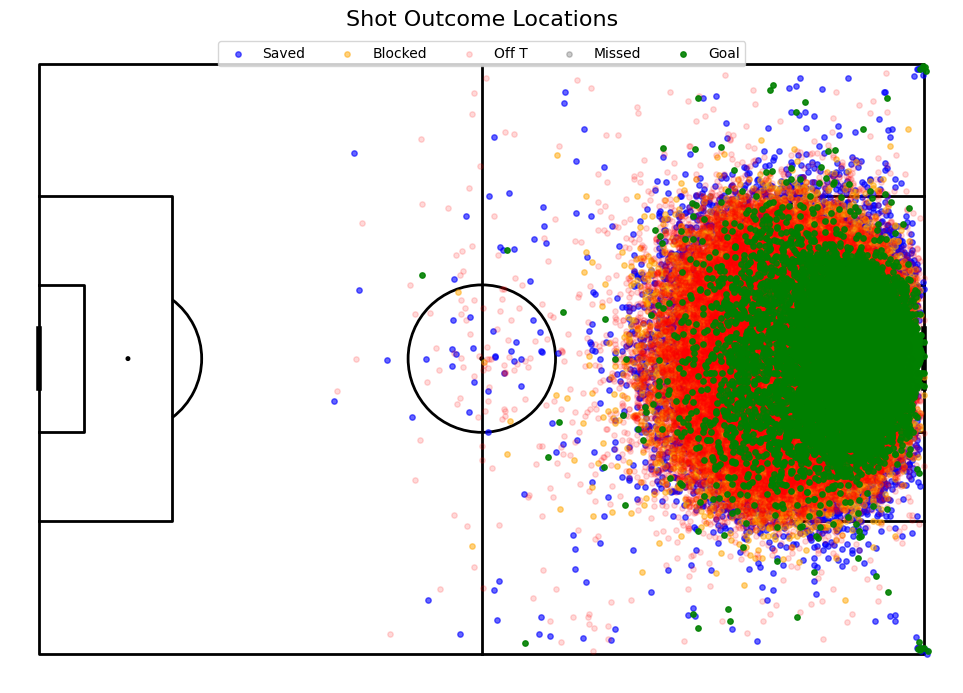

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch


df = pd.read_csv('C:/Users/Acer/Desktop/analytics/clean_shots_final.csv')

# Filter only relevant outcomes
df = df[df['shot.outcome.name'].isin(['Goal', 'Saved', 'Blocked', 'Off T', 'Missed'])]

# Set up pitch = distribution map
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(10, 7))

outcome_styles = {
    'Saved':  ('blue', 0.6),
    'Blocked': ('orange', 0.5),
    'Off T':  ('red', 0.15),
    'Missed': ('black', 0.2),
    'Goal':   ('green', 0.9)  
}


for outcome in ['Saved', 'Blocked', 'Off T', 'Missed', 'Goal']: 
    color, alpha = outcome_styles[outcome]
    sub_df = df[df['shot.outcome.name'] == outcome]
    pitch.scatter(sub_df['x'], sub_df['y'], ax=ax, label=outcome, color=color, alpha=alpha, s=15)

ax.set_title('Shot Outcome Locations', fontsize=16)
ax.legend(loc='upper center', ncol=5)
plt.tight_layout()
plt.show()


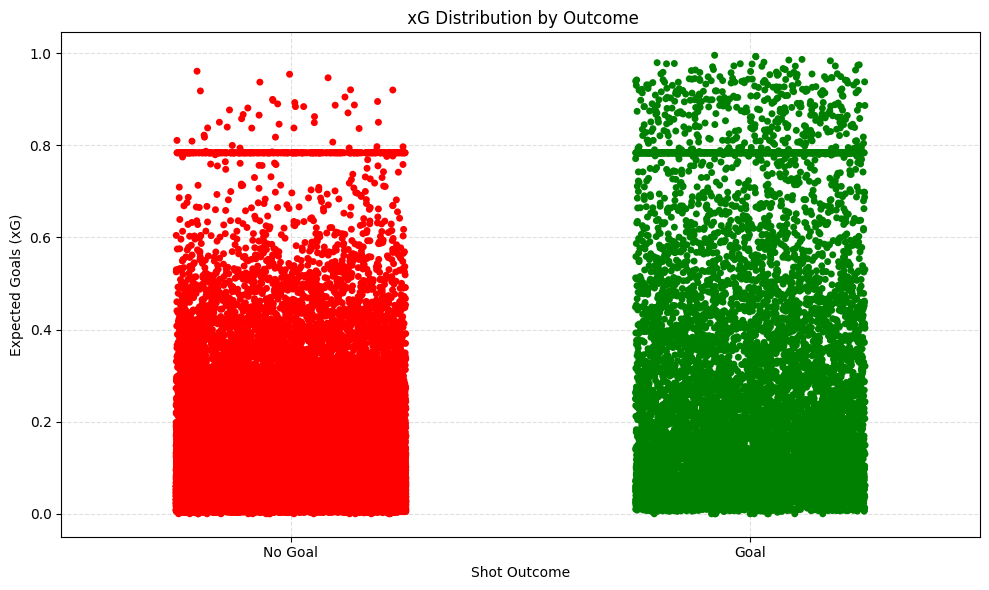

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:/Users/Acer/Desktop/analytics/clean_shots_final.csv')

# Create binary outcome column as string
df['is_goal'] = df['shot.outcome.name'].apply(lambda x: '1' if x == 'Goal' else '0')

# Plot= strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='is_goal', y='shot.statsbomb_xg', jitter=0.25, palette={'1': 'green', '0': 'red'})

# Labels and styling
plt.xticks([0, 1], ['No Goal', 'Goal'])  
plt.ylabel('Expected Goals (xG)')
plt.xlabel('Shot Outcome')
plt.title(' xG Distribution by Outcome')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


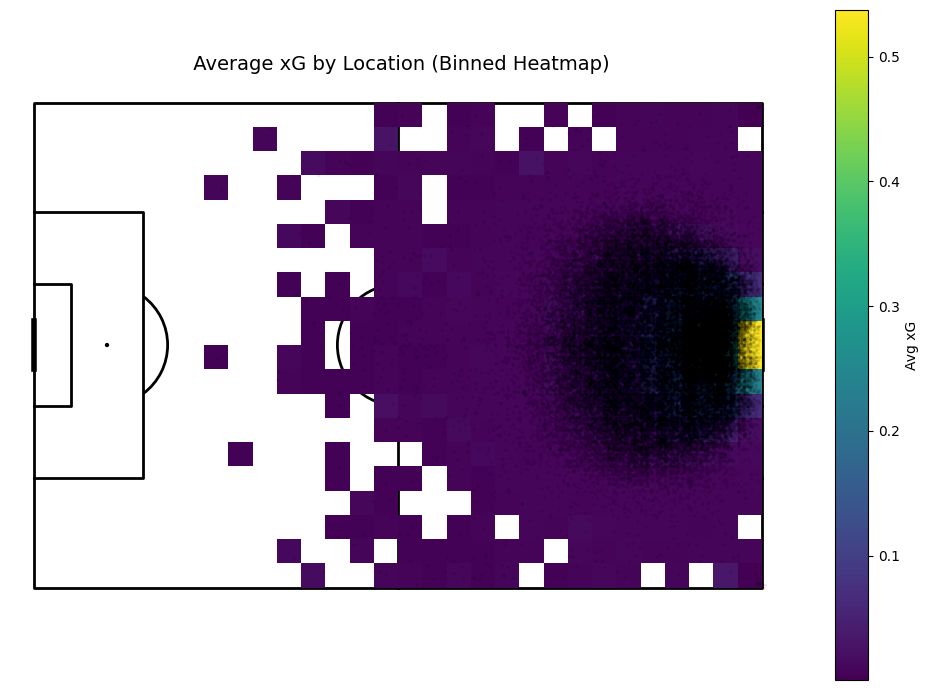

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import numpy as np


df = pd.read_csv('C:/Users/Acer/Desktop/analytics/clean_shots_final.csv')

# Create pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')
fig, ax = pitch.draw(figsize=(10, 7))

# Bin data using average xG
bins = pitch.bin_statistic(df['x'], df['y'], df['shot.statsbomb_xg'], statistic='mean', bins=(30, 20))

pcm = pitch.heatmap(bins, ax=ax, cmap='viridis')
pitch.scatter(df['x'], df['y'], ax=ax, alpha=0.05, color='black', s=2)

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label("Avg xG")
ax.set_title(" Average xG by Location (Binned Heatmap)", fontsize=14)
plt.tight_layout()
plt.show()


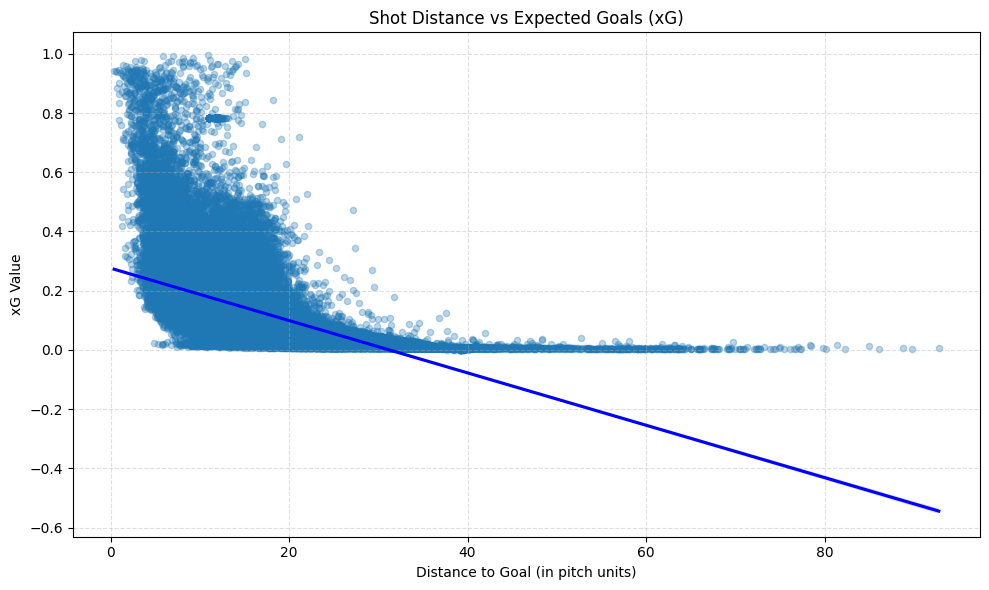

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('C:/Users/Acer/Desktop/analytics/clean_shots_final.csv')

# Calculate Euclidean distance from goal center (120, 40)
df['distance_to_goal'] = np.sqrt((120 - df['x'])**2 + (40 - df['y'])**2)

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='distance_to_goal', y='shot.statsbomb_xg', scatter_kws={'alpha': 0.3, 's': 20}, line_kws={'color': 'blue'})
plt.title('Shot Distance vs Expected Goals (xG)')
plt.xlabel('Distance to Goal (in pitch units)')
plt.ylabel('xG Value')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_3672\475345171.py:15: RuntimeWarning: invalid value encountered in scalar power
  angle = np.arctan2(8 * dx, dx**2 + dy1**2)**0.5 + np.arctan2(8 * dx, dx**2 + dy2**2)**0.5


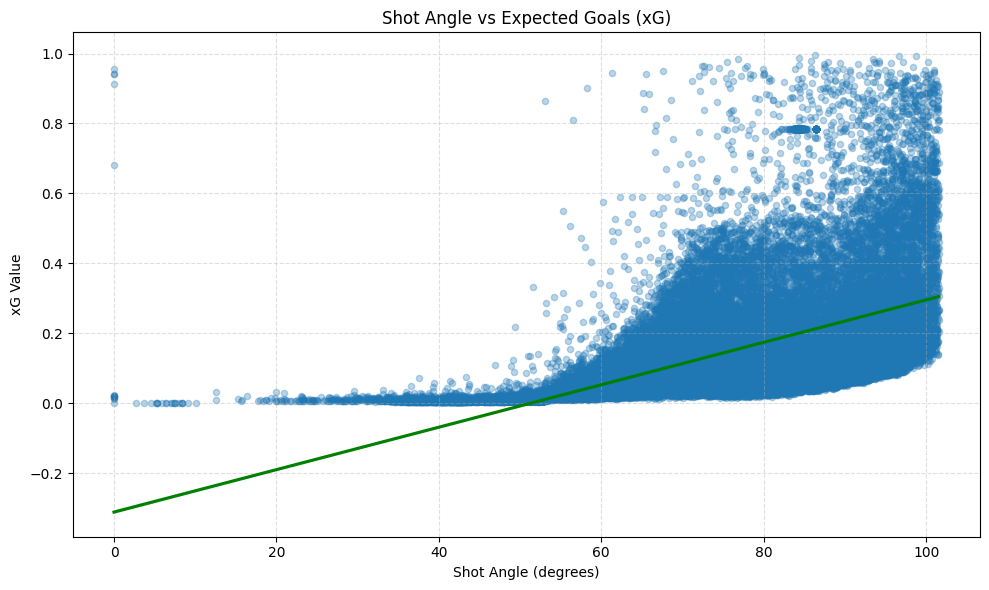

In [14]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 6.0 MB/s eta 0:00:02
   ------------- -------------------------- 2.9/8.7 MB 9.5 MB/s eta 0:00:01
   -------------------------------- ------- 7.1/8.7 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 14.7 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------

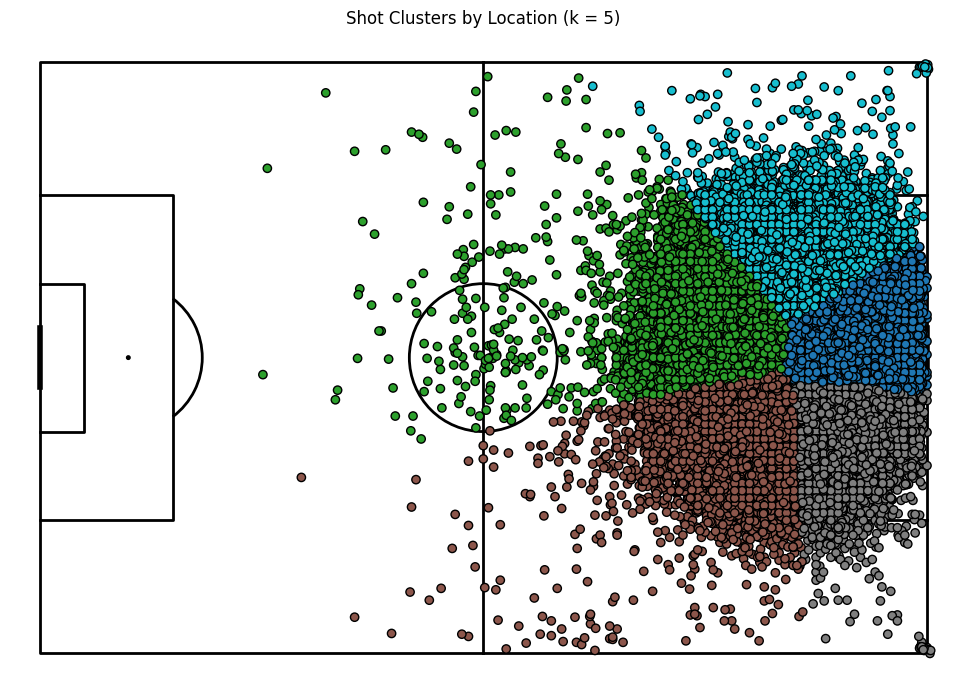

Cluster-wise Shot Efficiency Summary:
   cluster    avg_xg  goal_rate  shot_count
0        0  0.213270   0.220581       26734
3        3  0.105299   0.113322       16934
4        4  0.052675   0.057180       15250
2        2  0.034315   0.035342       13723
1        1  0.034607   0.034140       14470


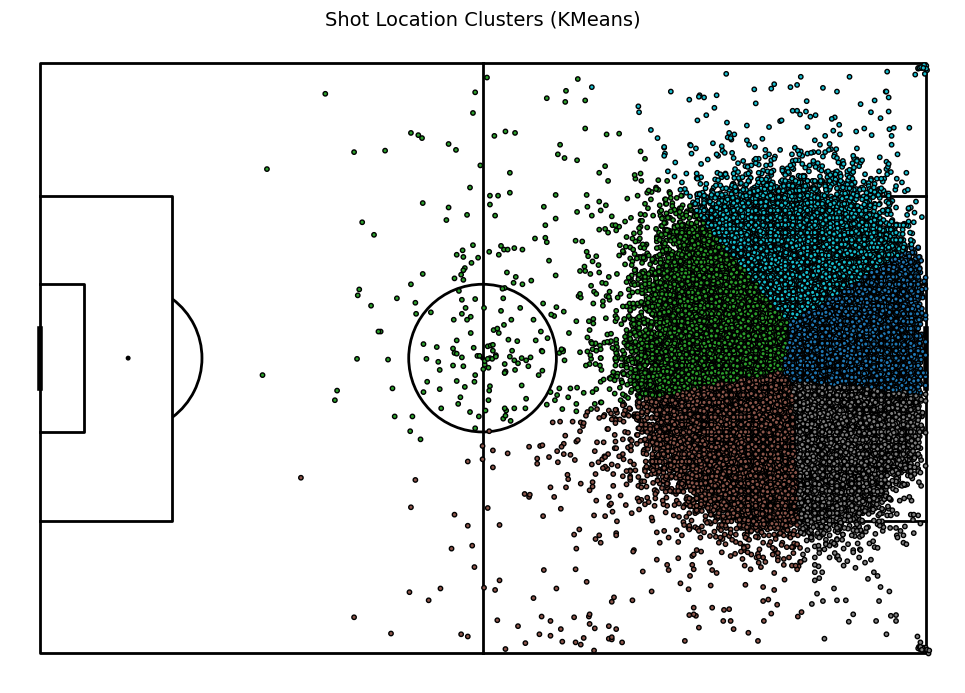